<a href="https://colab.research.google.com/github/lukilearn/Capstone_1_AirBnb_NYC_2019/blob/main/AirBnb_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# 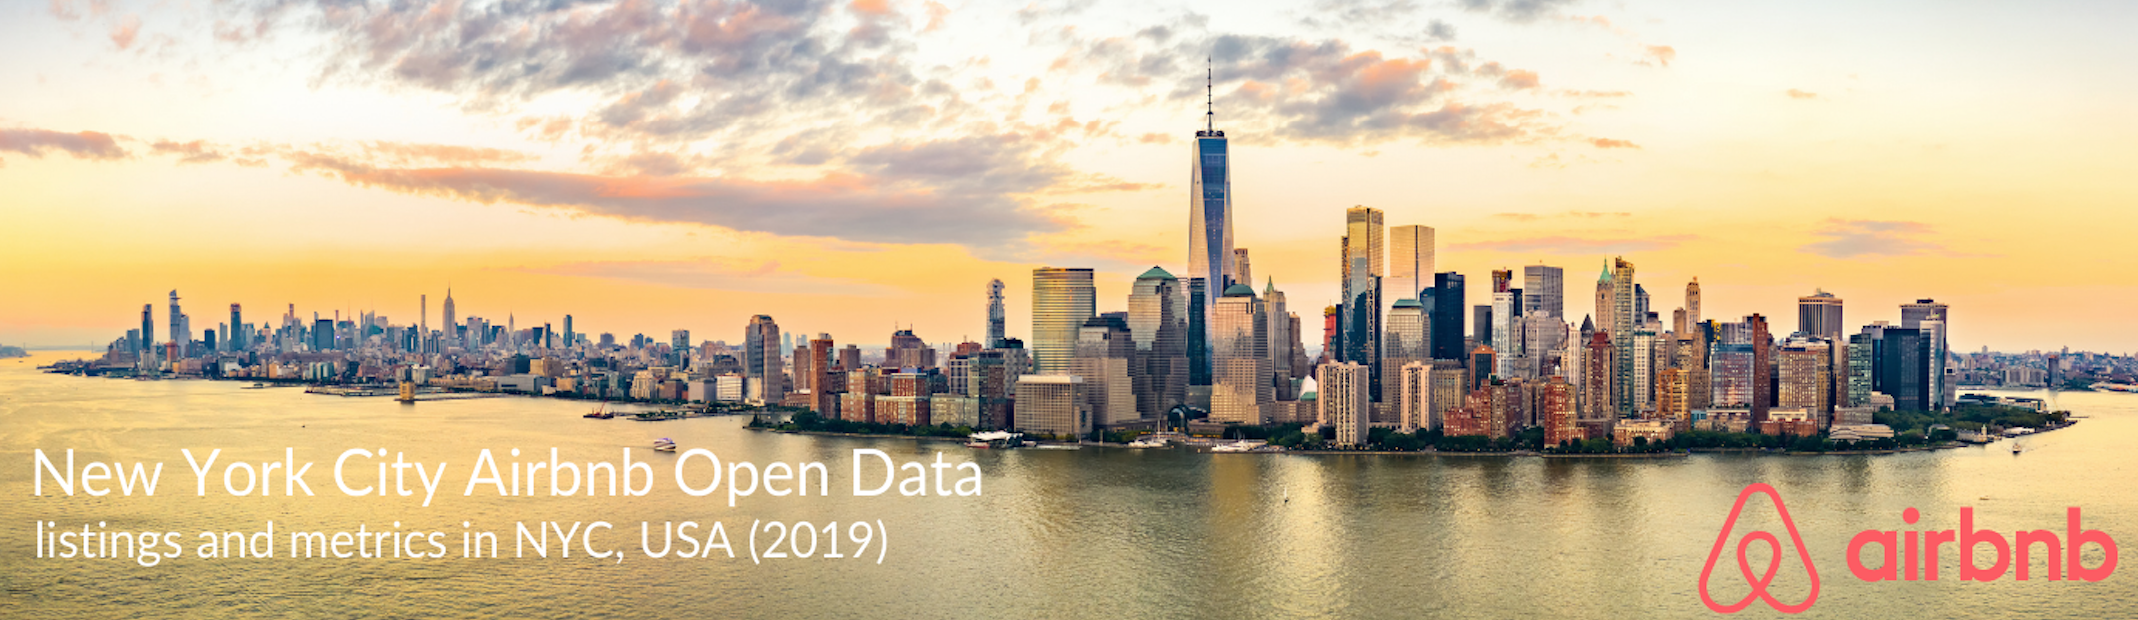

Airbnb is an online marketplace for renting and booking private accomodations. The company was conceived in 2008 after its founders rented out an air mattress in their living room, effectively turning their apartment into a bed and breakfast, to offset the high cost of rent in San Francisco. Airbnb is a shortened version of its original name, AirBedandBreakfast.com. Currently on Airbnb there are 2.9 million advertisements in around 81.000 cities and 191 countries. Airbnb is very sucessful mainly by solving following problems:

**Saved money** Hotel prices for some for us are sometimes quite high and we don’t have the money to stay there. By opening up the possibility of private accommodation, the prices of accommodation costs have been reduced. Having several “accomodation” providers, competing for the customer, the price will always decrease. Furthermore, platform like Airbnb can concentrate thousands of places to stay in a single city. More offer, more options.

**Unused space** Many people have unused space at home. Airbnb has made it possible to find additional income in way that we hadn't even thought about before. For a short stay, even a small sleeping space can be useful.

**Genuine human touch** Unlike hotels, most of Airbnb objects provide accommodation where you feel like in your own home.
Thanks to the enormous popularity of portal, more than 260 million guests have booked and stayed in Airbnb properties across the world.ty's five boroughs: Manhattan, Brooklyn, Bronx, Queens, and Staten Island.


## **Step 1 : Importing Libraries:**


In [1]:
#Importing all Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## **Step 2 : Loading the Airbnb (NYC) 2019 dataset**


In [2]:
#Mounting drive to load data 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Step 3 : Now copy the file path from your google gdrive to get access of given data**


In [3]:
#Loading csv File

df=pd.read_csv('/content/drive/MyDrive/Almabetter_Capstone_Project/AirBnb_Booking_Analysis/Airbnb NYC 2019.csv')

# <center> **1. Data Exploration and variable identification** </center>


## **1) Now checking the data whether it is mounted correctly or not**




In [4]:
# Head of Dataframe

df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [5]:
#Tail fo DataFrame

df.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

In [6]:
# What is the meaning of each column type is described below: 
#+----------------------+-----------------------------------------------------+
#| 1. id                            |listing id                               |
#+----------------------+-----------------------------------------------------+
#| 2. name                          | Name of the Property                    | 
#+----------------------+-----------------------------------------------------+
#| 3. host_id                       | Unique id for each listed host.         |
#+----------------------+-----------------------------------------------------+
#| 4. host_name                     | Name of the host                        |
#+----------------------+-----------------------------------------------------+
#| 5. neighbourhood_group           | location                                |
#+----------------------+-----------------------------------------------------+
#| 6. neighbourhood                 | Area                                    |
#+----------------------+-----------------------------------------------------+
#| 7. latitude                      | latitude coordinates                    |
#+----------------------+-----------------------------------------------------+
#| 8. longitude                     | longitude                               |
#+----------------------+-----------------------------------------------------+
#| 9. room_type                     | listing space type                      |
#+----------------------+-----------------------------------------------------+
#| 10. price                        | Price in dollars                        |
#+----------------------+-----------------------------------------------------+
#| 11. minimum_nights               | Minimum nights required to stay         |
#+----------------------+-----------------------------------------------------+
#| 12. number_of_reviews            | No. of reviews written for the listing  |
#+----------------------+-----------------------------------------------------+
#| 13. last_review                  | Last reviewed date for the listing      |
#+----------------------+-----------------------------------------------------+
#| 14. reviews_per_month            | Total review per month for the listing  |
#+--------------------- +-----------------------------------------------------+
#| 15.calculated_host_listings_count| Total no of listing against the host id |
#+----------------------+------------------------------------------------------+
#| 16. availability_365             | Number of days is available for booking |
#+----------------------+------------------------------------------------------+

##**2) Getting basic details/information about the data, its columns and respective data types**.

In [7]:
# Creating a single function which gives us basics of the data

def dataFund(df):
    print("Size of the data: ")     # Getting Total size of rows and columns
    print(df.size)
    print("="*70)
    print("\nShape of the data: ")  # Getting Shape of the dataset i.e., (rows,columns)
    print(df.shape)
    print("="*70)
    print("\nColumns of the data: ")   # Get the List of all Columns
    print(df.columns)
    print("="*70)
    print("\n DataTypes of each column in data: ")    #Get to know datatype of each column
    print(df.dtypes)
    print("="*70)    

# returing the result from the data
dataFund(df)

Size of the data: 
782320

Shape of the data: 
(48895, 16)

Columns of the data: 
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

 DataTypes of each column in data: 
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month      

In [8]:
# Using info() method to get information such as count of non-null values, data types etc. of each column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## **3) Let's Find out Categorical and Numerical Columns present in the given dataset**

In [9]:
# Check the Number of Categorical and Numerical columns present in the dataset :

print('Number of quantitative features (Numerical Columns): {}'.format(len([d for d in df.columns if df.dtypes[d] != 'object'])))
print('Number of qualitative features (Categorical Columns): {}'.format(len([d for d in df.columns if df.dtypes[d] == 'object'])))

Number of quantitative features (Numerical Columns): 10
Number of qualitative features (Categorical Columns): 6


In [10]:
# Understanding Numerical Columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical = df.select_dtypes(include=numerics)
numerical.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [11]:
# Understanding Categorical Columns:

categorical = ['object','bool']

categorical = df.select_dtypes(include=categorical)
categorical.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

# <center> **2. Descriptive Summary Statistics** </center>

In [12]:
# Using .describe() function to see some statistical information of the data

# checking the descriptive summary statistics such as mean, mode etc.(NaN excluded) for the numerical columns of dataset.
df.describe()

# Observations:-
# 1. reviews_per_month column has few missing values.
# 2. Rest all 9 numerical columns have no missing value.
# 3. Minimum value in price column is 0$ and max is 10,000$. 
#     (0$ means free airbnbs, impossible, so bad data)
# 4. There is/are properties whose number of reviews is 0 (i.e., no reviews present).
# 5. There is/are properties whose availability_365 for booking is 0 day. (explored later)
# 6. Maximum value for minimum_nights column is 1250. (explored later)

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [13]:
# Using describe method for categorical features to get a broad idea about dataset.
# it gives the count, unique, top (most frequent value), and corresponding frequency of remaining columns. 
df.describe(include=['O'])

name host_name neighbourhood_group neighbourhood  \
count            48879     48874               48895         48895   
unique           47905     11452                   5           221   
top     Hillside Hotel   Michael           Manhattan  Williamsburg   
freq                18       417               21661          3920   

              room_type last_review  
count             48895       38843  
unique                3        1764  
top     Entire home/apt  2019-06-23  
freq              25409        1413

In [14]:
# Getting the names of 5 neighbourhood_groups/Boroughs
print("NYC's 5 neighbourhood_groups/Boroughs are:",'\n',list(df['neighbourhood_group'].unique()),'\n')

# Getting the names of 3 room_type
print("Airbnbs are of 3 room_type:",'\n',list(df['room_type'].unique()),'\n')

# getting the neighbourhood_group of 'Williamsburg' location.
print('Williamsburg belongs to', str(df[df['neighbourhood']=='Williamsburg'].neighbourhood_group.unique()),'Borough.')

NYC's 5 neighbourhood_groups/Boroughs are: 
 ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'] 

Airbnbs are of 3 room_type: 
 ['Private room', 'Entire home/apt', 'Shared room'] 

Williamsburg belongs to ['Brooklyn'] Borough.


**Observations:**-



*   Airbnb is present in all 5 NYC Boroughs (namely Brooklyn, Manhattan, Queens, Staten Island and Bronx), and in total 221 unique neighbourhood locations within all 5 Boroughs.
*   Airbnb is of 3 unique types of rooms (namely 'Private room', 'Entire home/apt' and 'Shared room'). Out of these, maximum Airbnbs are of 'Entire home/apt' room_type.

*  Manhattan Neighbourhood group has the highest number of airbnb listings (21,661 Nos.)
*  Across all 5 Neighbourhood_groups, Neighbourhood "Williamsburg, Brooklyn" has the highest number of listings (3,920).


**Note:** Since Manhattan has the maximum share of airbnbs, it was tempting to assume that neighbourhood with maximum airbnbs must belong to Manhattan Borough. However as per above descriptive statistics, it turns out that as Williamsburg of Brooklyn has the maximum airbnbs.

In [15]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

💠Minimum price is zero which is not possible .

In [16]:
# Data Manipulation:


df[df['price']==0]

id                                               name    host_id  \
23161  18750597  Huge Brooklyn Brownstone Living, Close to it all.    8993084   
25433  20333471      ★Hostel Style Room | Ideal Traveling Buddies★  131697576   
25634  20523843    MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)   15787004   
25753  20608117                    Sunny, Quiet Room in Greenpoint    1641537   
25778  20624541      Modern apartment in the heart of Williamsburg   10132166   
25794  20639628  Spacious comfortable master bedroom with nice ...   86327101   
25795  20639792  Contemporary bedroom in brownstone with nice view   86327101   
25796  20639914       Cozy yet spacious private brownstone bedroom   86327101   
26259  20933849                              the best you can find   13709292   
26841  21291569  Coliving in Brooklyn! Modern design / Shared room  101970559   
26866  21304320             Best Coliving space ever! Shared room.  101970559   

          host_name neighbourhood_group       neighbourhood  latitude  \
23161      Kimberly            Brooklyn  Bedford-Stuyvesant  40.69023   
25433        Anisha               Bronx     East Morrisania  40.83296   
25634  Martial Loft            Brooklyn            Bushwick  40.69467   
25753        Lauren            Brooklyn          Greenpoint  40.72462   
25778       Aymeric            Brooklyn        Williamsburg  40.70838   
25794       Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68173   
25795       Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68279   
25796       Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68258   
26259        Qiuchi           Manhattan         Murray Hill  40.75091   
26841        Sergii            Brooklyn            Bushwick  40.69211   
26866        Sergii            Brooklyn            Bushwick  40.69166   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
23161  -73.95428     Private room      0               4                  1   
25433  -73.88668     Private room      0               2                 55   
25634  -73.92433     Private room      0               2                 16   
25753  -73.94072     Private room      0               2                 12   
25778  -73.94645  Entire home/apt      0               5                  3   
25794  -73.91342     Private room      0               1                 93   
25795  -73.91170     Private room      0               1                 95   
25796  -73.91284     Private room      0               1                 95   
26259  -73.97597  Entire home/apt      0               3                  0   
26841  -73.90670      Shared room      0              30                  2   
26866  -73.90928      Shared room      0              30                  5   

      last_review  reviews_per_month  calculated_host_listings_count  \
23161  2018-01-06               0.05                               4   
25433  2019-06-24               2.56                               4   
25634  2019-05-18               0.71                               5   
25753  2017-10-27               0.53                               2   
25778  2018-01-02               0.15                               1   
25794  2019-06-15               4.28                               6   
25795  2019-06-21               4.37                               6   
25796  2019-06-23               4.35                               6   
26259         NaN                NaN                               1   
26841  2019-06-22               0.11                               6   
26866  2019-05-24               0.26                               6   

       availability_365  
23161                28  
25433               127  
25634                 0  
25753                 0  
25778                73  
25794               176  
25795               232  
25796               222  
26259                 0  
26841               333  
26866               139

In [17]:
# A function for price_correction
def price_correction(x):
    if x==0:
        return 100
    else:
        return x

In [18]:
df['price']=df['price'].apply(price_correction)

In [19]:
df['price'].apply(price_correction)

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [20]:
# checking is there any zero value present in the 'price' column

df[df['price']==0]

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []

In [21]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.743184   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.144546   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420     10.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

💠In this data you can see that max minimum nights is 1250 it is also not relevant

In [22]:
def minimum_nights_correction(x):
  if x>365:
    return 365
  else:
    return x

In [23]:
df['minimum_nights']=df['minimum_nights'].apply(minimum_nights_correction)

In [24]:
df[df['minimum_nights']==365]

id                                               name    host_id  \
700      258690                CHELSEA 1 Bdrm Plus Sleeping Loft!!    1359611   
754      271694                Easy, comfortable studio in Midtown    1387370   
1305     568684                800sqft apartment with huge terrace    2798644   
1449     649561                 Manhattan Sky Crib (1 year sublet)    3260084   
2150     992977                       Park Slope Pre-War Apartment    4000059   
2831    1586935                   Luxury Gramercy Lg 1Bd w Balcony    8457613   
2854    1615764                                                NaN    6676776   
3398    2037951                      Modern West Village Apartment    4191006   
3945    2454507                 Close to everything - Jr 1 bedroom    9991763   
4372    2942732                         Large 1 bdrm, River views!     160337   
4437    3029690                   Safe Sunny South Facing Near All    7245581   
4794    3399909                     Super cute and sunny 2 bedroom      39304   
5385    3891031                LAST DAY TO BOOK Bedroom on Wall St   20133610   
5767    4204302                   Prime W. Village location 1 bdrm   17550546   
7328    5402632  Private BDR/BATH in Luxury Condo near Times Sq...   27927011   
7355    5431845                Beautiful Fully Furnished 1 bed/bth    3680008   
8014    6169897                          Wonderful Large 1 bedroom   10720264   
8658    6654984             Beautiful apartment in trendy Brooklyn    5417600   
10829   8341919                Brand New Luxury Apt Lease Takeover   43945071   
11193   8668115                 Zen Room in Crown Heights Brooklyn    8996336   
13404  10053943                 Historic Designer 2 Bed. Apartment    2697686   
13788  10386936                      Private Room in Williamsburg!   53471415   
13886  10514203                Giant Landmark Apartment in the Sky    3710888   
14285  11096888                    Peaceful apartment close to F/G    2228137   
15381  12328112                                   GREENPOINT OASIS    1180190   
15899  12855469                 Gorgeous Studio in Doorman Luxury!   70251988   
15946  12888849                 Bright Luxury Studio, Central Loc.   16476167   
15980  12916189     Family Friendly BK Townhome With Garden Oasis!     951917   
17338  13687060  Luxury drmn Bldg + Empire State Views & Roof Top!   21419119   
17811  13963005                       Gorgeous 2 Bedroom apartment   41870118   
19794  15851599  Stunning 1 Br, West Village Luxury w/ great views   48815188   
20096  16095062  THANKSGIVING up to 6 GUESTS + HOT TUB + FIREPLACE  104911818   
23011  18635370         Fantastic Sunny peaceful room in Riverdale   91385196   
26341  20990053                    Beautiful place in Brooklyn! #2  151084261   
31730  24740209         Long term/16 month sublet. Great location!    4267075   
34487  27362309                                      Not available   14621589   
38469  30273310             Farm house style Bay Ridge (private D)   31760835   
38664  30378211                       Shared Studio (females only)  200401254   
39875  30981877                                  The NYC Adventure  231474021   
44429  34221161                 Room with sofa bed or air mattress    9295237   
44736  34384645   The BEAUTY & the EAST/free street parking & WIFI  219738858   
47620  35834935                             Williamsburg Apartment   82674375   
48446  36270376     Beautiful home on Staten Island, walk to ferry     444904   

            host_name neighbourhood_group       neighbourhood  latitude  \
700            Andrea           Manhattan             Chelsea  40.74618   
754             James           Manhattan             Midtown  40.75282   
1305       Alessandra            Brooklyn            Bushwick  40.70202   
1449            David           Manhattan             Chelsea  40.75164   
2150         Shahdiya            Brooklyn          Park Slope  40.67359  

In [25]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.743184   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.144546   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420     10.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         6.942980          23.274466           1.373221   
std         17.530294          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max        365.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000



 **So we can notice that the availability column is having minimum value as well as the 25th percentile is 0, so this seems awkward because having availability days as 0 for 36% of data is a bit shocking if you have a business providing stays on Airbnb and the availibility is 0 days that is an extreme case and extreme cases are shocking when it comes 36% of data is having an extreme case.**

**But it is practically not possible to exactly detect which apartments are really having availability 0 days, so we will not alter this column if we try to alter it we can end up manipulating apartments that are really busy (i.e 0 no. of days availability).**

# <center> **3. Data Wrangling/Data Cleaning** </center>


## **1. Formatting Inconsistent Data Types**

###  Converting last_review_date from string data type to datetime format.



In [26]:
#  Converting the last_review column data to datetime format without timestamp.

# Creating new column with last_review data converted to datetime format(without timestamp).
df['date_col'] = pd.to_datetime(df.last_review)

# Creating new column with just the date part without timestamp.
df['last_review'] = df['date_col'].dt.date

# dropping the other column
df.drop(['date_col'], axis =1, inplace = True)

In [27]:
# Checking the data type of last_review column values.
type(df.loc[0,'last_review'])

datetime.date

## **2. Checking and Handling Missing Values**

In [28]:
# Checking for missing values

df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [29]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print("=======================================================")
        print(f"{column} ==> Missing Values : {df[column].isnull().sum()}, dtypes : {df[column].dtypes}")

name ==> Missing Values : 16, dtypes : object
host_name ==> Missing Values : 21, dtypes : object
last_review ==> Missing Values : 10052, dtypes : object
reviews_per_month ==> Missing Values : 10052, dtypes : float64


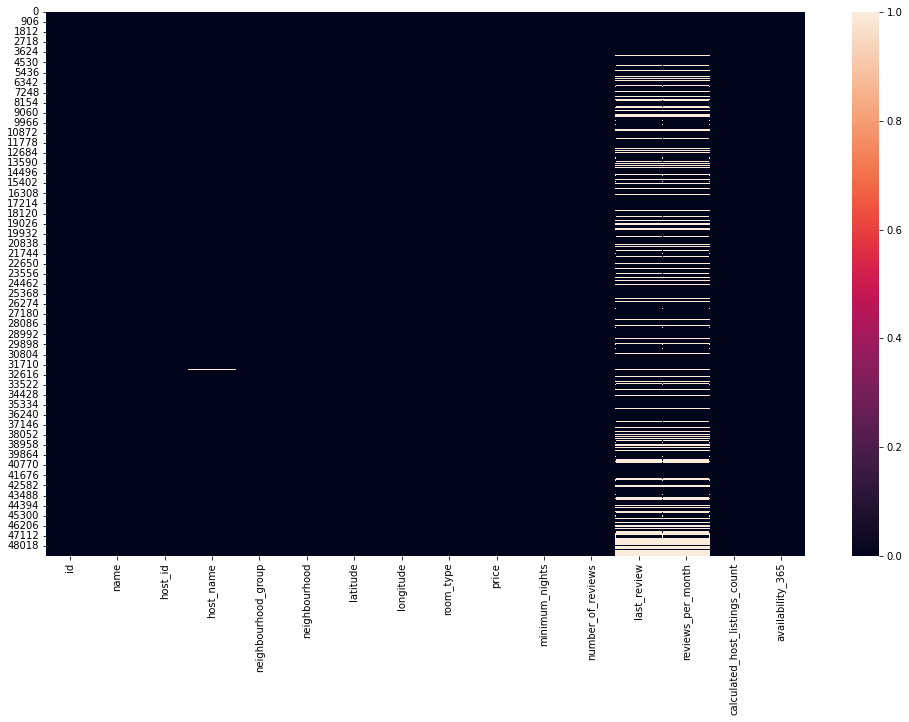

In [30]:
#Visualization of Null values using Heatmap
plt.figure(figsize=(17,10))
sns.heatmap(df.isnull())

In [31]:
import missingno as msno

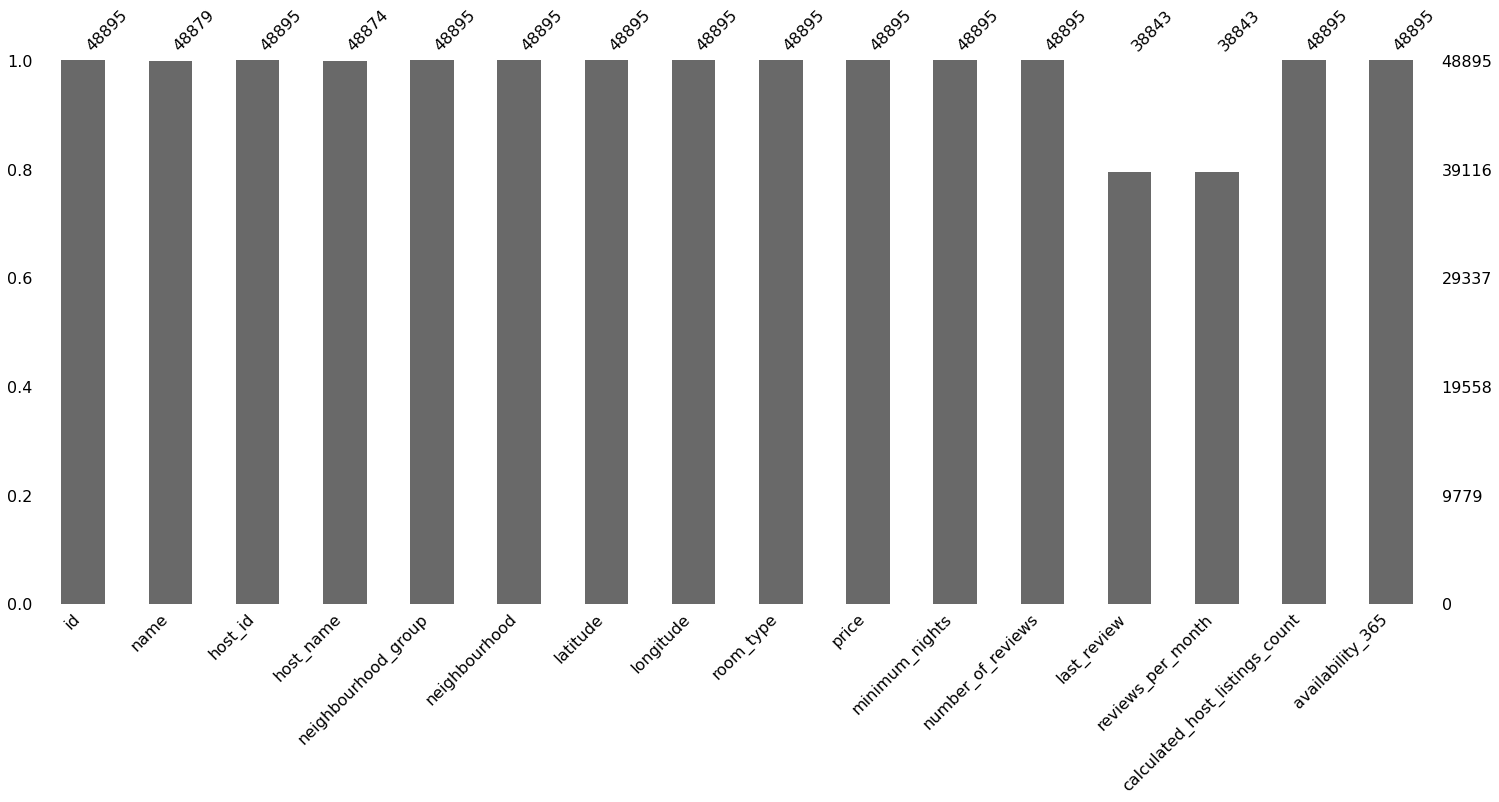

In [32]:
msno.bar(df)

In [33]:
# Percentages of missing values per column
null_percent = df.isna().sum().sort_values(ascending=False)*100 / len(df)
null_percent

last_review                       20.558339
reviews_per_month                 20.558339
host_name                          0.042949
name                               0.032723
id                                 0.000000
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

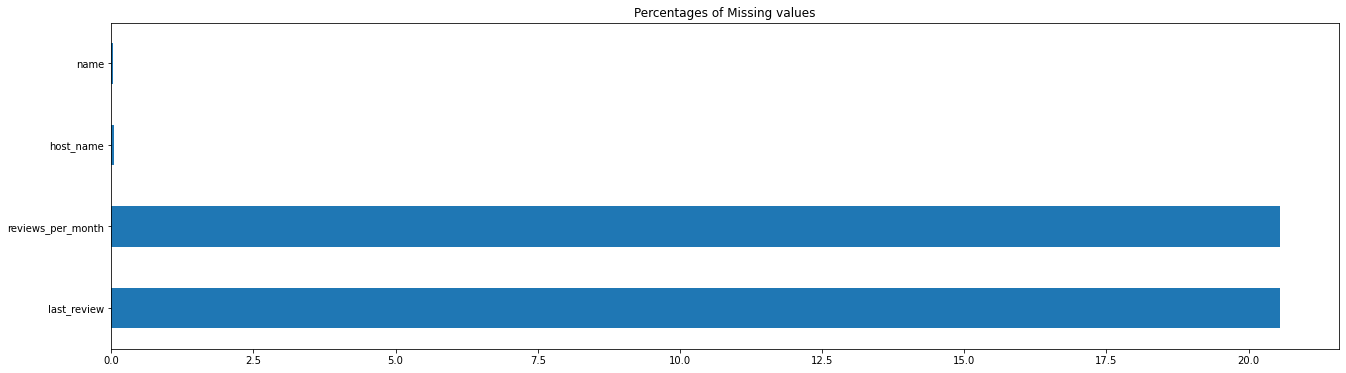

In [34]:
# plotting a bar plot for null values (%) for better visualization
null_percent[null_percent != 0].plot(kind='barh', figsize=(22,6), title ='Percentages of Missing values')

In [35]:
missing_values = df.isnull().sum().sort_values(ascending=False)
percentage_missing_values = round((df.isnull().sum()/df.isnull().sum().sum()).sort_values(ascending=False),3)
null_in_data = pd.concat([missing_values, percentage_missing_values],keys=['Missing values','Percentage'],axis=1)
null_in_data.head()

Missing values  Percentage
last_review                 10052       0.499
reviews_per_month           10052       0.499
host_name                      21       0.001
name                           16       0.001
id                              0       0.000

## **3.Dropping unnecessary features.**

In [36]:
df.columns



Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

From above data, the **observations** are:




1.  Size of the data is large
2.  There are two features from the columns **id**, **host_id** and **last_review** are not necessary because pandas already set indexes to whole data. In future dropping will be the best option.
Before doing any processing and cleaning lets first drop id,host_id and last_review columns


In [37]:
df.drop(['id','host_id','last_review'],axis=1,inplace=True)

In [38]:
df.head()

name    host_name  \
0                Clean & quiet apt home by the park         John   
1                             Skylit Midtown Castle     Jennifer   
2               THE VILLAGE OF HARLEM....NEW YORK !    Elisabeth   
3                   Cozy Entire Floor of Brownstone  LisaRoxanne   
4  Entire Apt: Spacious Studio/Loft by central park        Laura   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0                NaN   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [39]:
df.isnull().sum()

name                                 16
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## **4. Handling Missing Value**

In [40]:
def impute_median(series):
    return series.fillna(series.median())

In [41]:
df.reviews_per_month=df["reviews_per_month"].transform(impute_median)

In [42]:
df.isnull().sum()

name                              16
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [43]:
df['host_name'].fillna("unavailable",inplace = True)
df['name'].fillna("unavailable",inplace = True)

In [44]:
df.isnull().sum()

name                              0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [45]:
!pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 7.6 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [46]:
import klib

# **Pearson's Feature Correlation Matrix (using KLib library)**


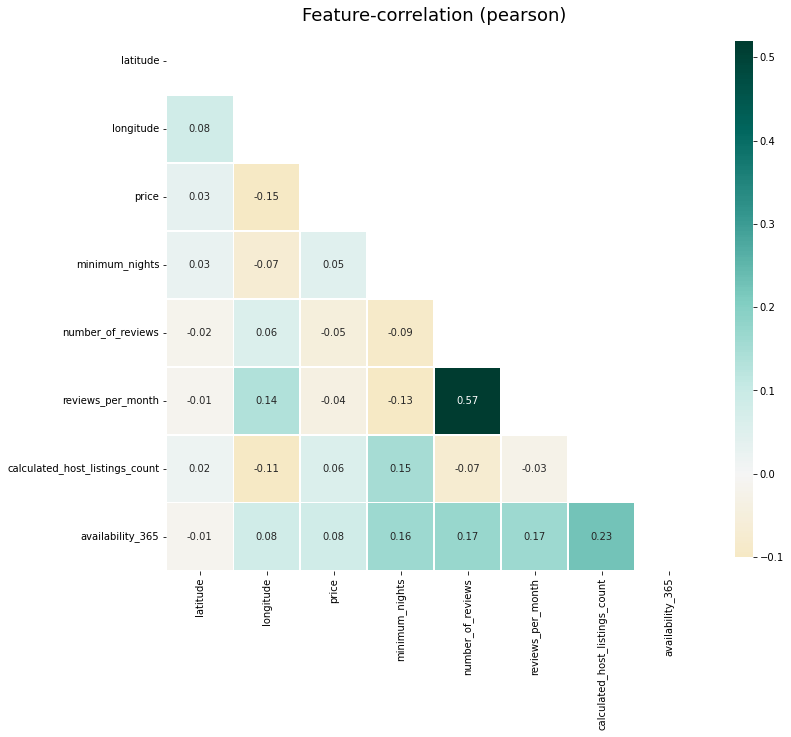

In [47]:
klib.corr_plot(df) # returns a visualization of the number and frequency of categorical features

GridSpec(6, 5)

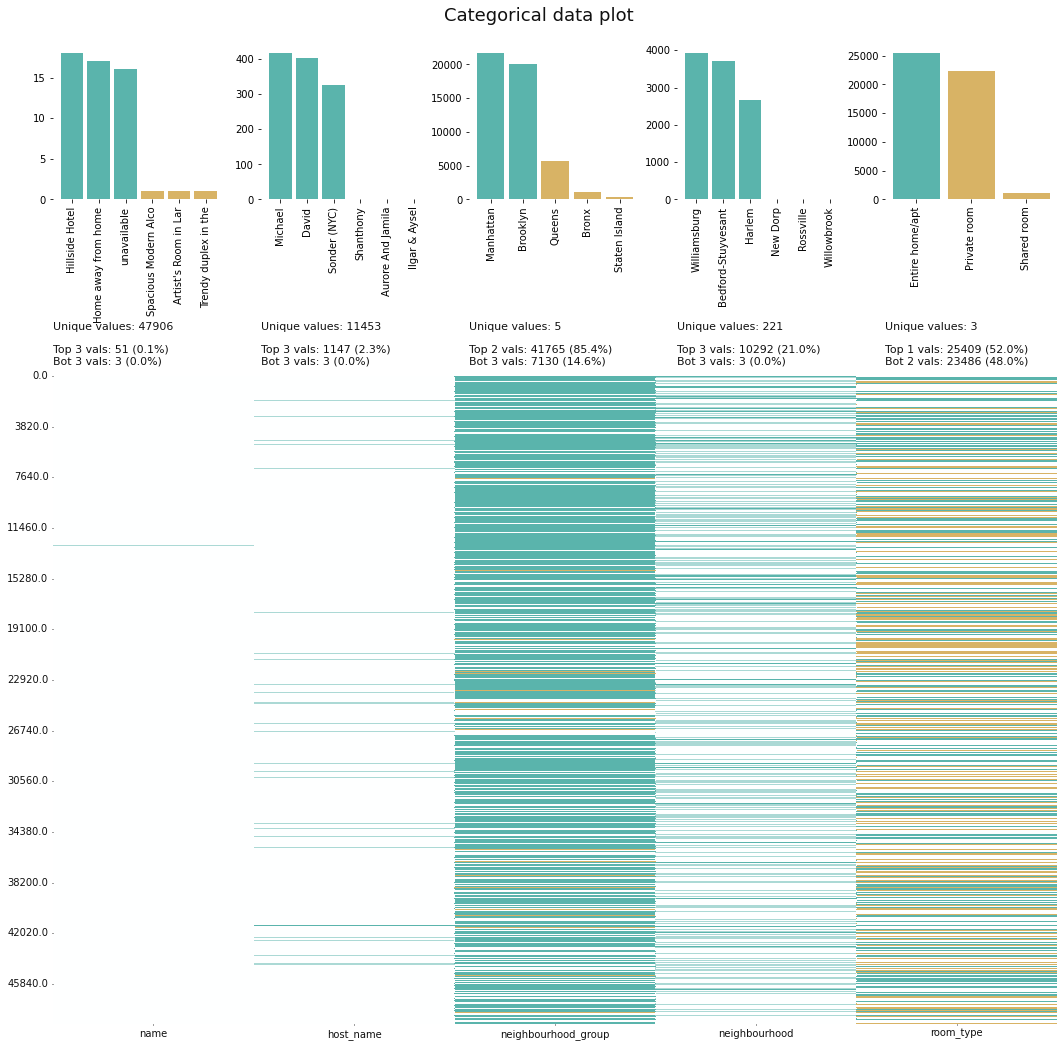

In [48]:
klib.cat_plot(df) # returns a visualization of the number and frequency of categorical features

Most interesting thing is that we can see, for name of apartment most common name is Hotel Hillside , may be having such fantasy names attracts more vistors.

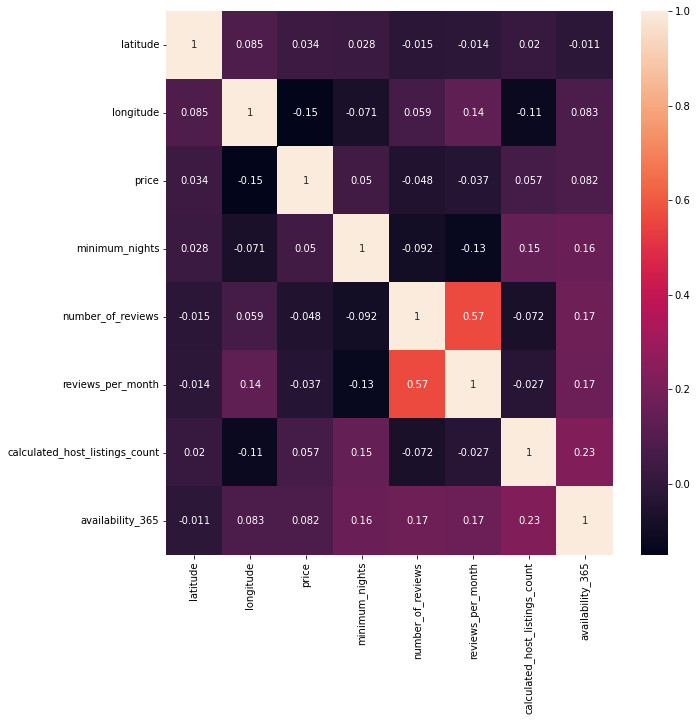

In [49]:
# Plotting the correlation. matrix
plt.figure(figsize= (10,10))

sns.heatmap(df.corr(), annot = True)
plt.show()

## **We can notice the followings**

**Number_of reviews and reviews_per_month is possitively correlated which is obvious (which means although its correlated but practicaly it doesnt make any sense )**



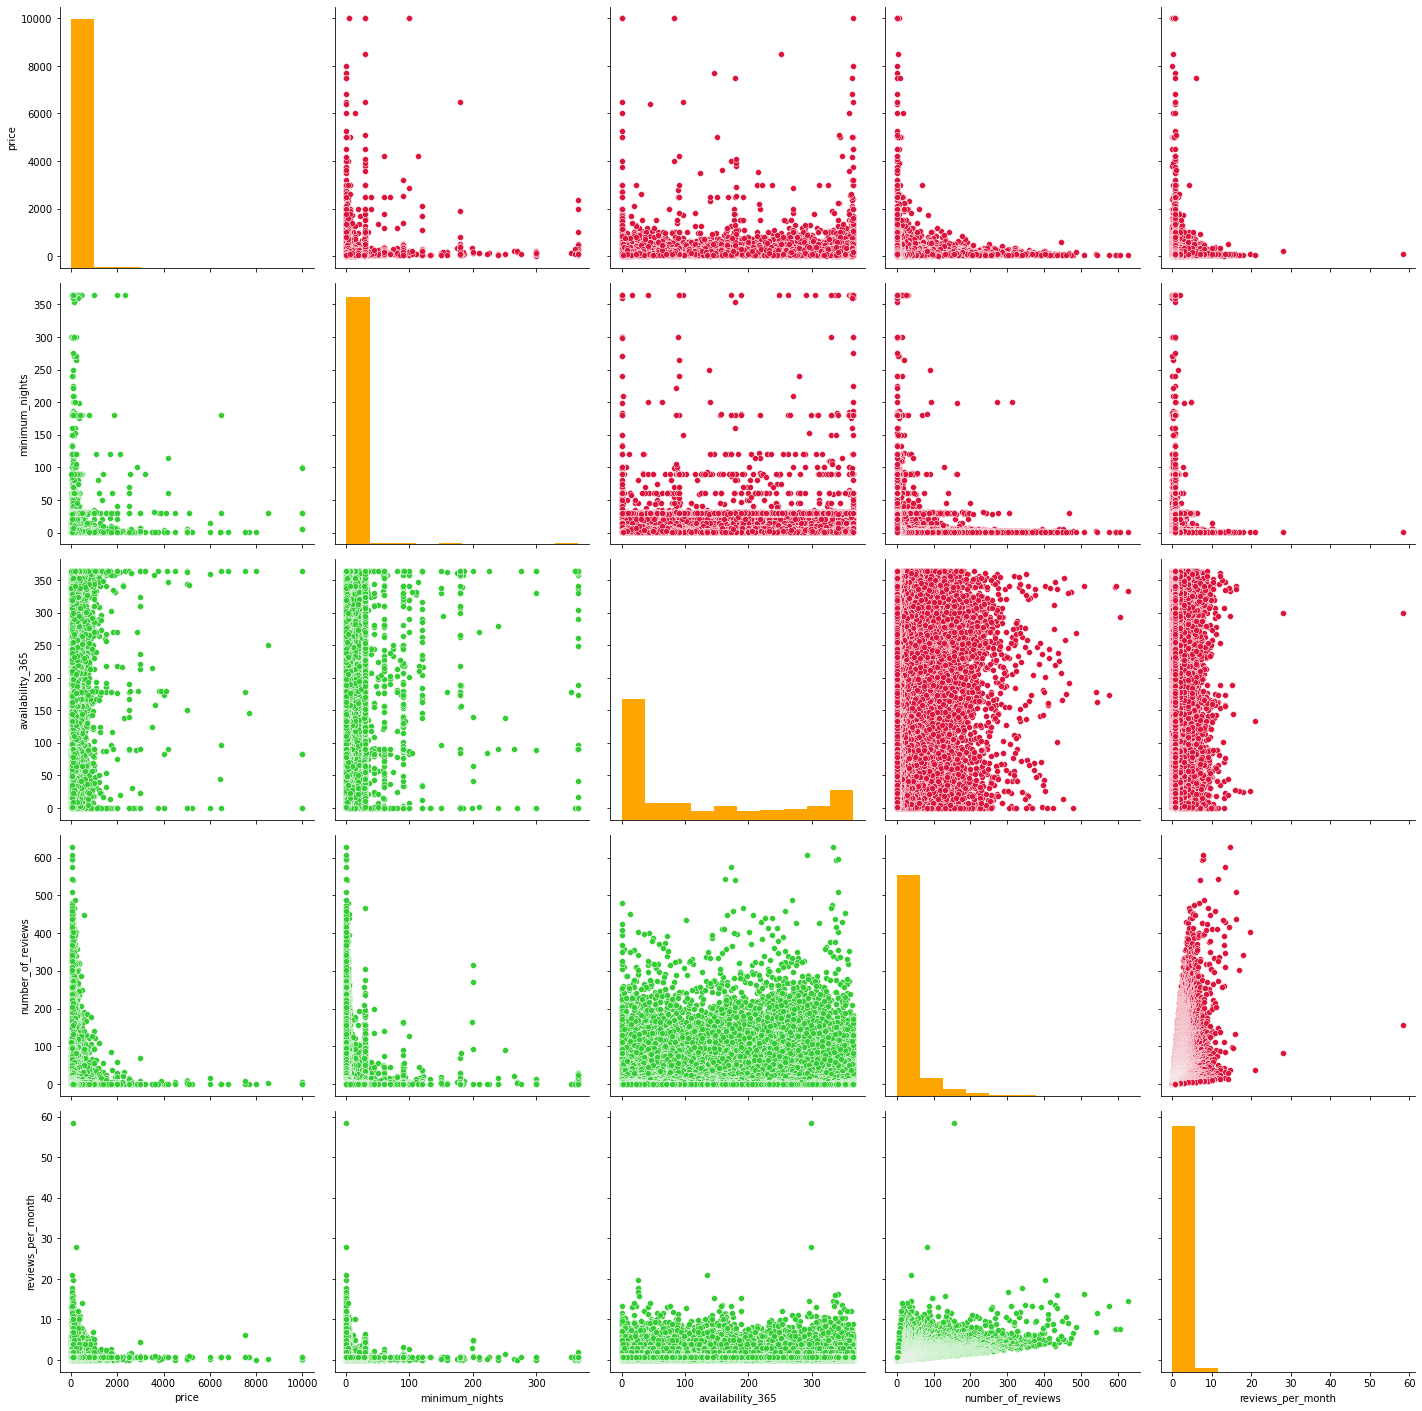

In [50]:
#Plotting a pair plot for bivariate analysis
g = sns.PairGrid(df,vars=['price','minimum_nights','availability_365','number_of_reviews','reviews_per_month'],size=4)
#setting color
g.map_upper(sns.scatterplot, color='crimson')
g.map_lower(sns.scatterplot, color='limegreen')
g.map_diag(plt.hist, color='orange')
#show figure
plt.show()

## **Observation:-**


**From above plot**

Number of reviews and review per month follows linear relationship between them.
Some plot has a extreme points






# <CENTER>**4).Detecting Outliers**

In [51]:
# lets observe normally the outliers or extreme values in statistical description
df.describe()

latitude     longitude         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170    152.743184        6.942980   
std        0.054530      0.046157    240.144546       17.530294   
min       40.499790    -74.244420     10.000000        1.000000   
25%       40.690100    -73.983070     69.000000        1.000000   
50%       40.723070    -73.955680    106.000000        3.000000   
75%       40.763115    -73.936275    175.000000        5.000000   
max       40.913060    -73.712990  10000.000000      365.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       48895.000000                    48895.000000   
mean           23.274466           1.238930                        7.143982   
std            44.550582           1.520861                       32.952519   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.280000                        1.000000   
50%             5.000000           0.720000                        1.000000   
75%            24.000000           1.580000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

## **Checking outliers of numerical columns using seaborn boxplot**

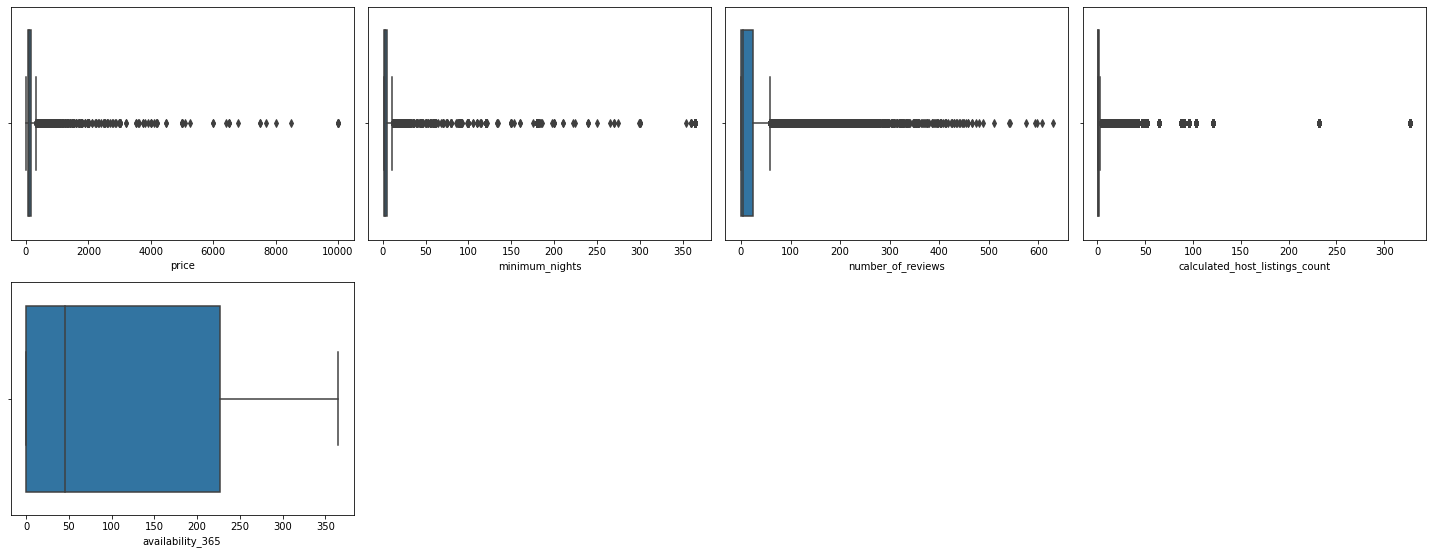

In [52]:
columns = [ 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

**--> We can clearly tell that,columns, viz., price, minimum_nights, calculated_host_listings_count has outliers or extreme values.**

**--> And, for availability_365 there is no single outlier in the column.**

## **Handling Data**

##**We can handle the data by removing outliers or setting proper limit!.**

To detect ouliers in target - 'price', Tukey test will be implemented, which defines an interquartile range comprised between the 1st and 3rd quartile of the distribution values (IQR). Outliers are rows whose values are outside IQR.

In [53]:


def tukey_outliers(df, column):
  Q1 = np.percentile(df[column], 25)
  Q3 = np.percentile(df[column], 75)
  IQR = Q3 - Q1
  outlier_step = 1.5 * IQR
  outliers_index = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
  return outliers_index

##**(a) Removing outliers for "Price" column**


In [54]:
outliers_index = tukey_outliers(df,'price')
df.drop(outliers_index, inplace=True)
df.reset_index(drop=True, inplace=True)

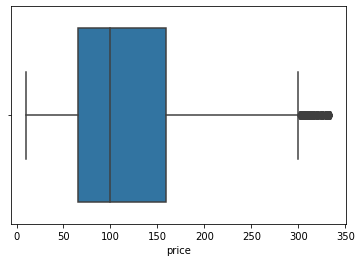

In [55]:
sns.boxplot(df['price'])
plt.show()

## **(b) Removing outliers for "Mininum_nights" column**



In [56]:
outliers_index = tukey_outliers(df,'minimum_nights')
df.drop(outliers_index, inplace=True)
df.reset_index(drop=True, inplace=True)

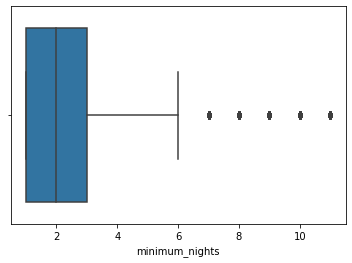

In [57]:
sns.boxplot(df['minimum_nights'])
plt.show()

## **(c) Removing outliers for "Number_of_reviews" column**

In [58]:
outliers_index = tukey_outliers(df,'number_of_reviews')
df.drop(outliers_index, inplace=True)
df.reset_index(drop=True, inplace=True)

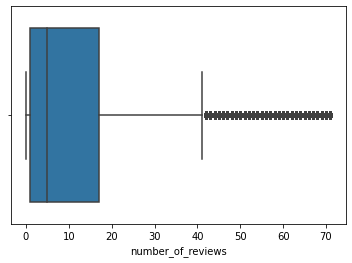

In [59]:
sns.boxplot(df['number_of_reviews'])
plt.show()

## **(d) Removing outliers for "calculated_host_listings_count" column**

---



In [60]:
outliers_index = tukey_outliers(df,'calculated_host_listings_count')
df.drop(outliers_index, inplace=True)
df.reset_index(drop=True, inplace=True)

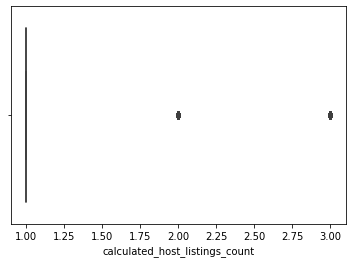

In [61]:
sns.boxplot(df['calculated_host_listings_count'])
plt.show()

## <center>  **5) DATA VISUALIZATION** </center>





**Visualize your data and search for pattern that can help you solve your problem.**  
**Correlation analysis helps us to see features relatations.**

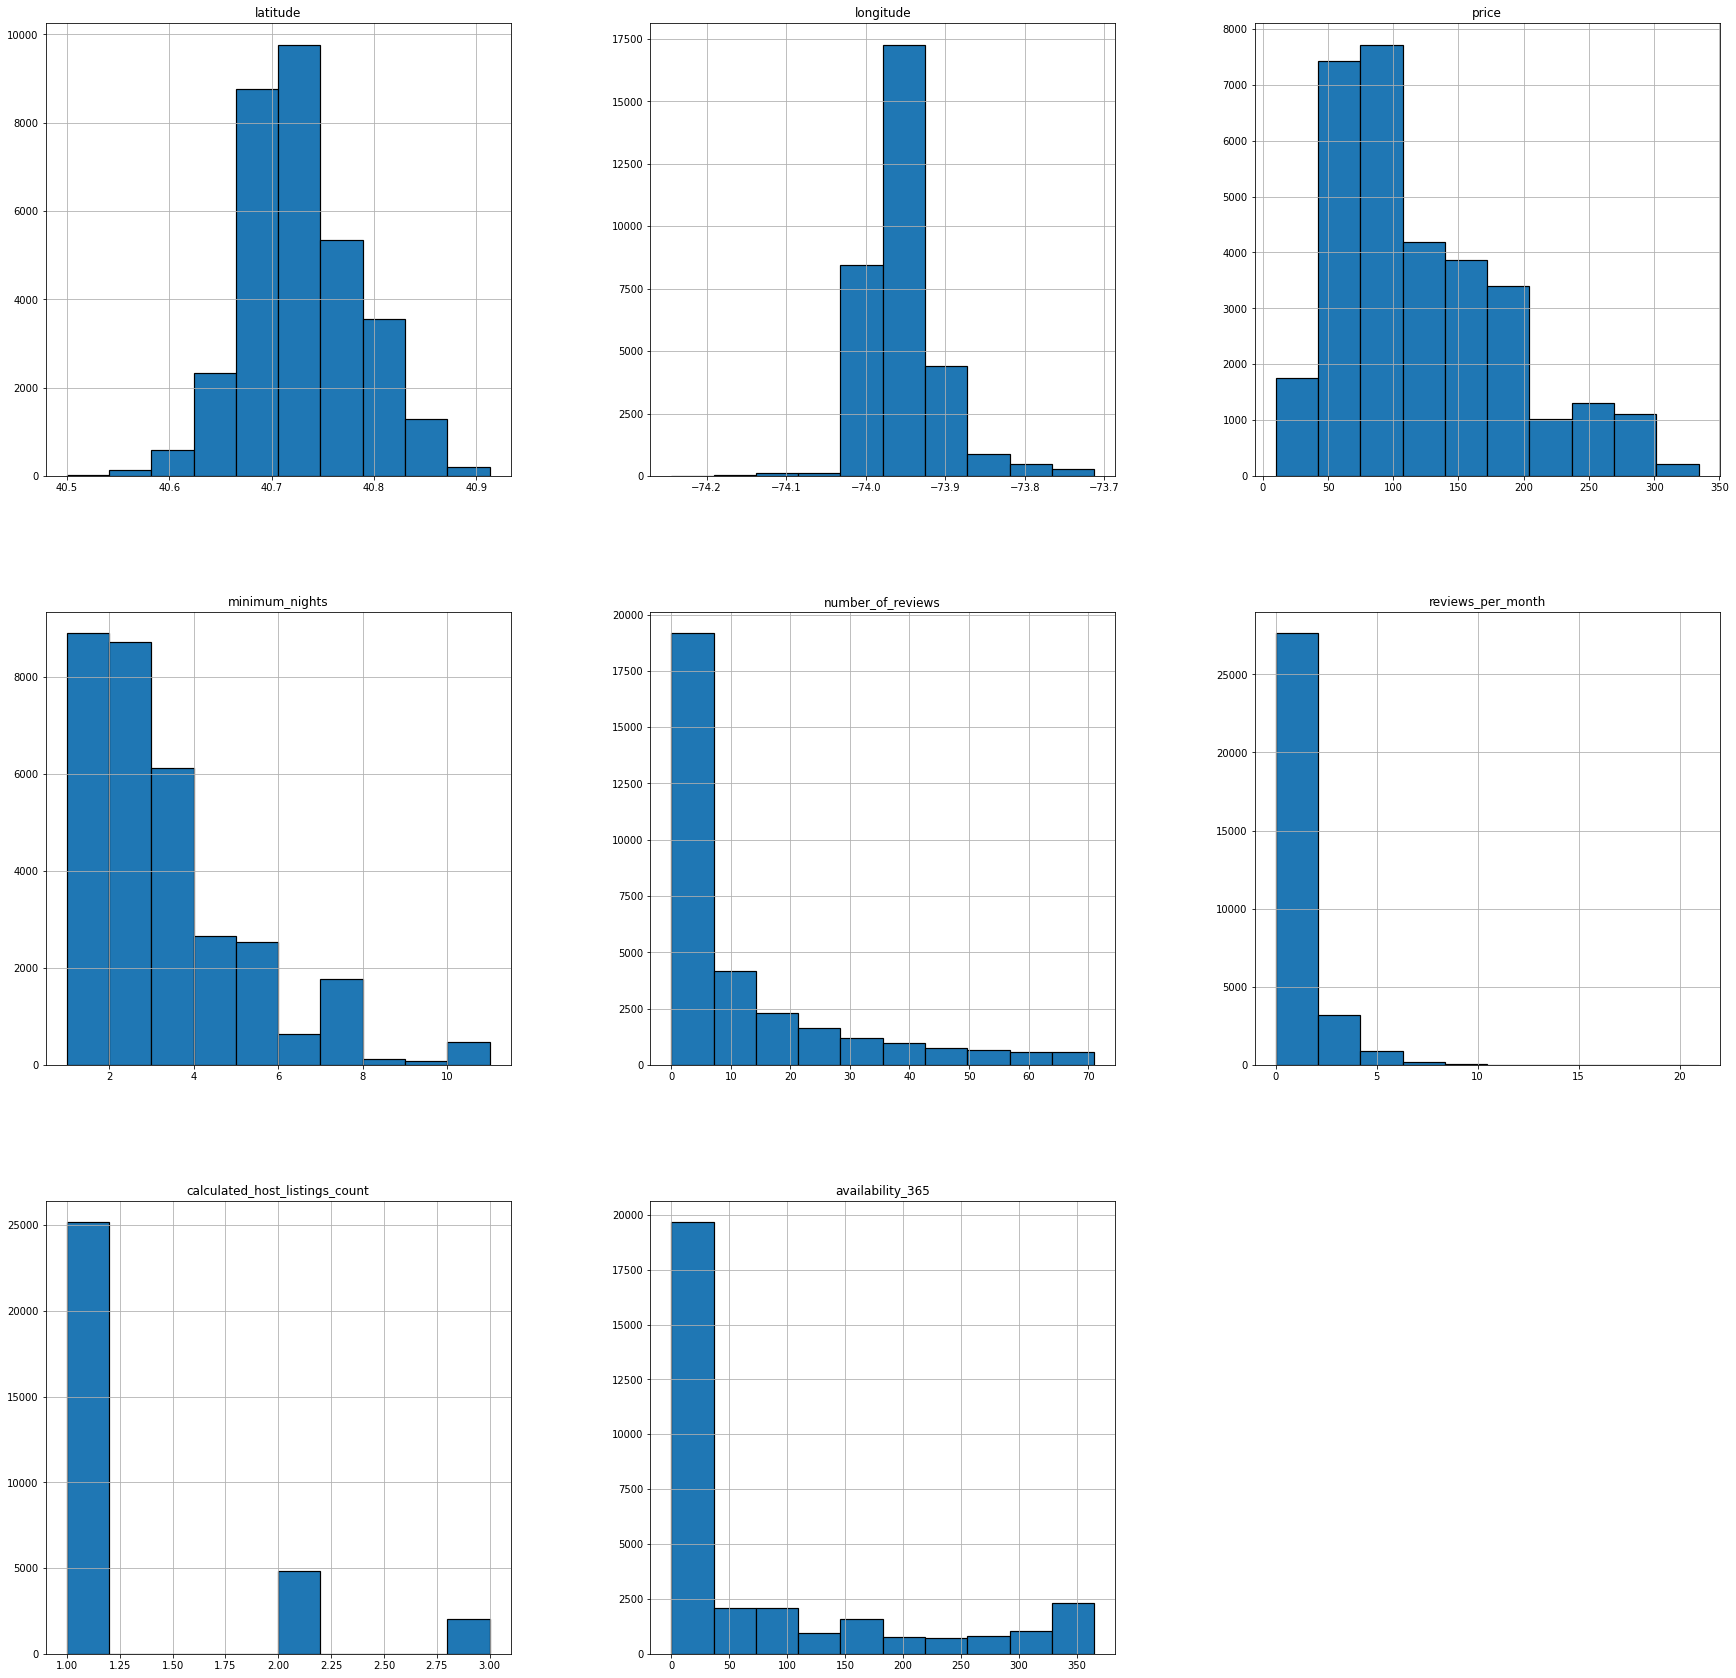

In [62]:
# Visualizing the distribution for every "feature"
df.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30));

# **univariante Analysis**





In [63]:

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

df["neighbourhood_group"].value_counts()


Brooklyn         14131
Manhattan        13209
Queens            3670
Bronx              754
Staten Island      240
Name: neighbourhood_group, dtype: int64

In [64]:
#Plot chart on the neighbourhood group :
ng = df["neighbourhood_group"].value_counts() 
fig = px.bar(y = ng.values,
             x = ng.index,
             color = ng.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text = ng.values,
             title = "Top Neighbourhood group",
             template = "plotly_dark"
             )
fig.update_layout(
    xaxis_title = "Neighbourhood group",
    yaxis_title = "count",
    font = dict(size=17,family="Franklin Gothic")
    )
fig.show()

In [65]:
  #Room types
rm = df["room_type"].value_counts() 
fig = px.bar(y = rm.values,
             x = rm.index,
             color = rm.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text = rm.values,
             title = "Room type",
             template = "plotly_dark"
             )
fig.update_layout(
    xaxis_title = "Room type",
    yaxis_title = "count",
    font = dict(size=17,family="Franklin Gothic")
    )
fig.show()

In [66]:
# Module Function for annonting a barplot (will be used later)
def annot(xplot):
  for p in xplot.patches:
      xplot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

<BarContainer object of 10 artists>

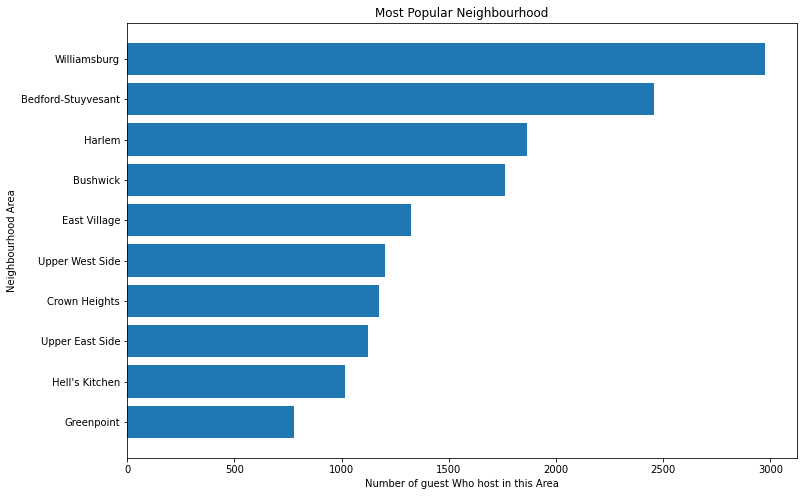

In [67]:
# neighbourhood area:

data = df.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()
plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)


# **Bivariante Analysis**

### **Types of room by neighbourhood regions**



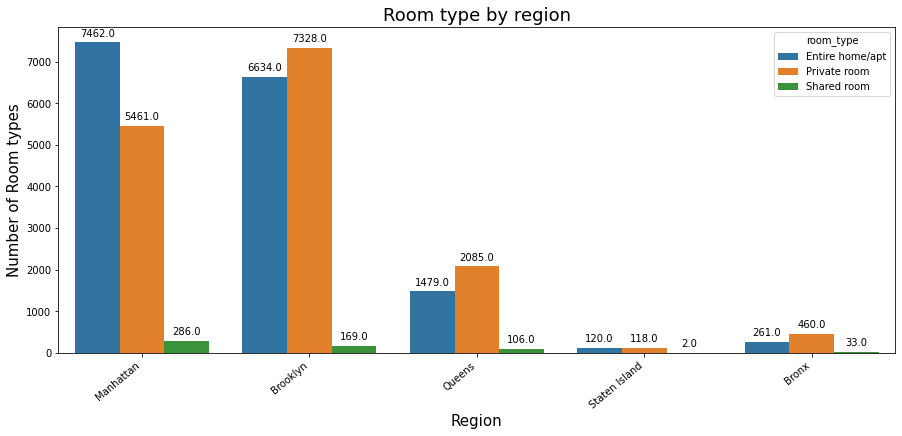

In [68]:
plt.figure(figsize = (15, 6))
ax = sns.countplot(x='neighbourhood_group', hue='room_type', data=df)
annot(ax)
#set the axes
ax.set_xlabel('Region', weight='normal', size=15)
ax.set_ylabel('Number of Room types', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.title('Room type by region', fontsize=18)

plt.show()

### **Average price for each room type**

In [69]:
df_price_room_type = pd.DataFrame(df.groupby(['room_type']).mean()['price'].sort_values())
df_price_room_type


price
room_type                  
Shared room       71.036913
Private room      80.416904
Entire home/apt  162.264352

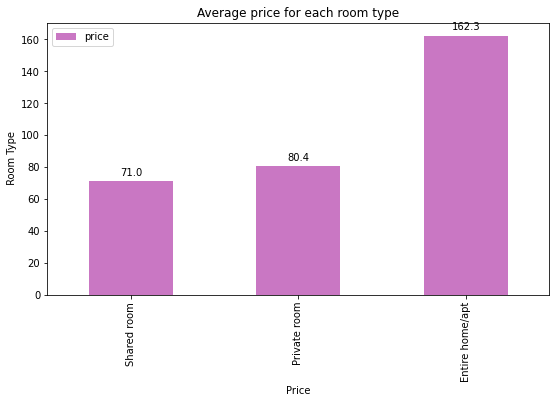

In [70]:
plt_5=df_price_room_type.plot(kind='bar' , title = 'Average price for each room type', figsize=(9,5), color = '#c977c3')
plt.xlabel("Price")
plt.ylabel(" Room Type")
annot(plt_5)

###**Rooms availabilty in different areas**


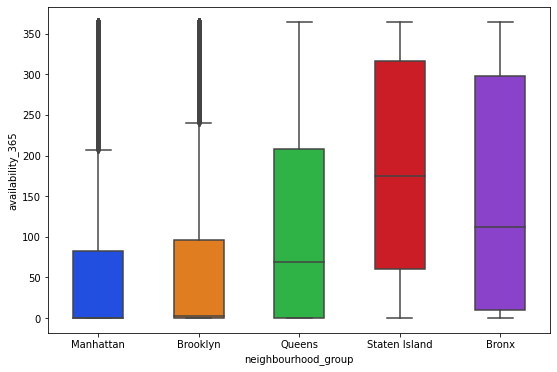

In [71]:
# rooms availabilty in different areas
plt.figure(figsize=(9,6))
sns.boxplot(data = df, x='neighbourhood_group', y='availability_365',palette='bright', width=0.5)
plt.show()

**The project of analysis the data staying people are Entire home/apt or private which are present in Manhattan,Brooklyn,Queens are in less price.**

## <center>  **6) EXPLORATORY DATA ANALYSIS** </center>

##**1. Price Analysis**


**1.1 Mean price of Various Room types in NYC**

In [72]:
mean_price=df.groupby('room_type')['price'].mean()


In [73]:
room_type = mean_price.index
print(room_type)

Index(['Entire home/apt', 'Private room', 'Shared room'], dtype='object', name='room_type')


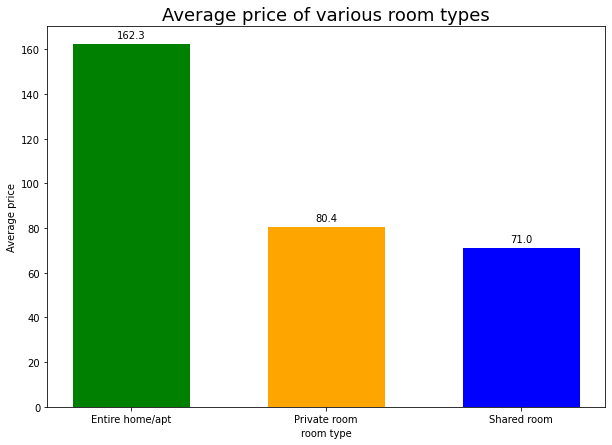

In [74]:
fig,ax = plt.subplots(figsize=(10, 7))
plt.bar(room_type,mean_price,color=['Green', 'Orange', 'Blue'], width=0.6)
plt.title('Average price of various room types',size=18)
plt.ylabel('Average price')
plt.xlabel('room type',size=10)
plt.xticks(rotation=0)
plt.show
annot(ax)

**1.2 Average cost price of different neighbourhood group**

<function matplotlib.pyplot.show(*args, **kw)>

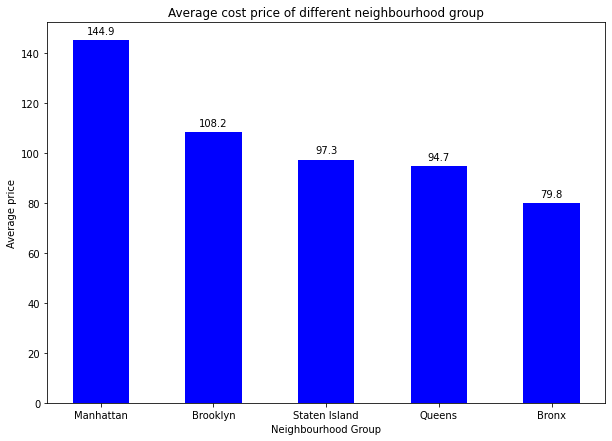

In [75]:
# Finding average cost price of different neighbourhood group.
fig,ax = plt.subplots(figsize=(10, 7))
average_price = df.groupby('neighbourhood_group')['price'].mean()
average_price.sort_values(ascending = False, inplace = True)
plt.bar( average_price.index, average_price, color = 'Blue', width = 0.5 )
annot(ax)
plt.title('Average cost price of different neighbourhood group',size=12)
plt.ylabel('Average price')
plt.xlabel('Neighbourhood Group',size=10)
plt.xticks(rotation=0)
plt.show


**Observation :**

**For buying a property to get business with airbnb, Brooklyen and queens are most prefered neighbourhood group because of less saturation level compaired to Manhatten and having a growing customer base as compared to other neighbourhood group**

**1.3 Top 10 cheapest neighbourhood**

In [76]:
top_10_cheapest_nbhd = df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending = True)[:10].reset_index()
top_10_cheapest_nbhd



neighbourhood      price
0         Bull's Head  46.000000
1       Port Richmond  48.333333
2         Eastchester  50.000000
3             Tremont  51.545455
4           Soundview  54.923077
5            New Dorp  57.000000
6      New Dorp Beach  57.400000
7           Bronxdale  59.411765
8         Hunts Point  59.500000
9  Westchester Square  61.333333

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

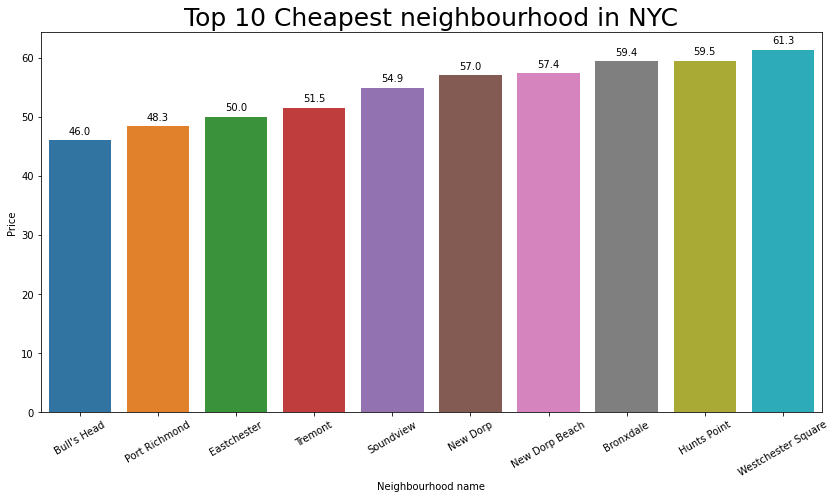

In [77]:
fig,ax = plt.subplots(figsize=(14, 7))

sns.barplot(x = top_10_cheapest_nbhd['neighbourhood'].head(10), y= top_10_cheapest_nbhd['price'].head(10))
plt.title('Top 10 Cheapest neighbourhood in NYC', size = 25)
plt.xlabel('Neighbourhood name')
plt.ylabel('Price')
annot(ax)
plt.xticks(rotation=30)

## **2. Listing Analysis**

**2.1 Airbnb listings neighbourhood_group wise**

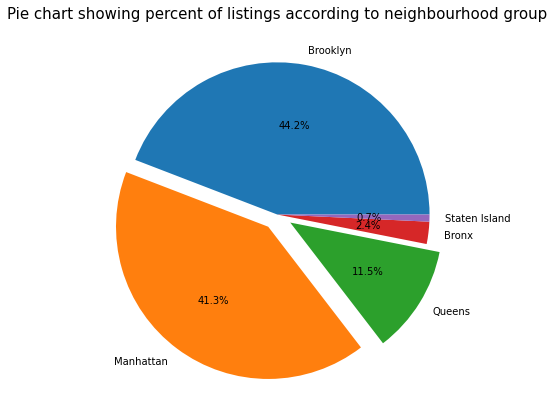

In [78]:
# Finding no. of Airbnb listing neighbourhood_group wise. 
groupwise_listing = df["neighbourhood_group"].value_counts(sort=True)

# Showing data percentage wise
plt.figure(figsize=(7,7))
exp = [0, 0.1, 0.1, 0, 0]
plt.pie(groupwise_listing,labels = groupwise_listing.index, explode = exp , autopct='%1.1f%%' )
plt.title("Pie chart showing percent of listings according to neighbourhood group" , size =15)
plt.show()


**Result and inference**




> 1.  Manhatten & Brooklyn are having high no. of listing.
2.  Staten island and Bronx have low no. of listing


Inference: If we want to do advertisement or marketing for selling flats we Should focus on Manhatten and Brooklyn.




##**3. Availability analysis**

**3.1 Checking availability of different room and different neighbourhood group.**

In [79]:
# Creating Data Frame of different neighbourhood_group , room_type and mean of availability_365
mean_aval = df.groupby(["neighbourhood_group","room_type"])['availability_365'].mean().reset_index(name='availability_365')
mean_aval

neighbourhood_group        room_type  availability_365
0                Bronx  Entire home/apt        133.689655
1                Bronx     Private room        159.408696
2                Bronx      Shared room        133.090909
3             Brooklyn  Entire home/apt         69.449050
4             Brooklyn     Private room         72.970524
5             Brooklyn      Shared room        117.284024
6            Manhattan  Entire home/apt         56.420263
7            Manhattan     Private room         68.612525
8            Manhattan      Shared room        105.713287
9               Queens  Entire home/apt        111.252874
10              Queens     Private room        122.675779
11              Queens      Shared room        132.320755
12       Staten Island  Entire home/apt        164.458333
13       Staten Island     Private room        201.228814
14       Staten Island      Shared room          4.000000

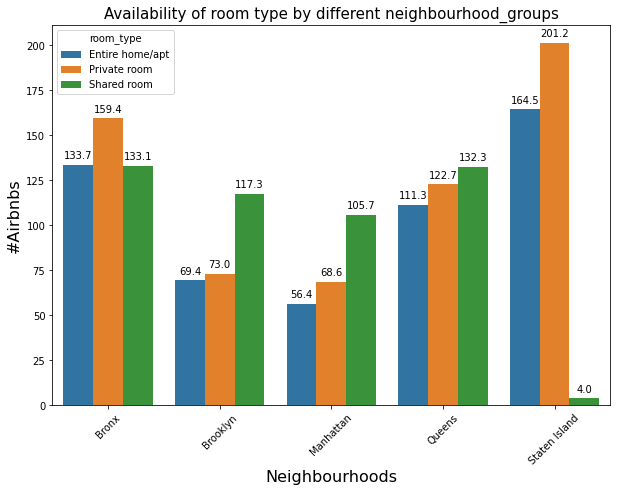

In [80]:
# Availibility according to neighbourhood group and room type.

fig,ax = plt.subplots(figsize=(10, 7))
sns.barplot(x='neighbourhood_group', y='availability_365',hue ='room_type', data=mean_aval)
plt.xticks(rotation = 45,size =10,)     

plt.title('Availability of room type by different neighbourhood_groups', size = 15)
ax.set_xlabel('Neighbourhoods',fontsize=16)
ax.set_ylabel('#Airbnbs',fontsize=16)
annot(ax)

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=10) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=10) #fontsize of the x tick labels
plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
plt.rc('legend', fontsize=10) #fontsize of the legend

**Observation:**

**From previous analysis we got to know that Manhatten and Brroklyn have highest count of property, this graph shows Manhatten and Brroklyn have less availibility then compared to other neighbourhood groups which is good for the host having these propeties.**


## **4. Profitability Analysis**


**4.1 Checking revenue generated by different property**

In [81]:
df[df["number_of_reviews"]== 0].count()

name                              6266
host_name                         6266
neighbourhood_group               6266
neighbourhood                     6266
latitude                          6266
longitude                         6266
room_type                         6266
price                             6266
minimum_nights                    6266
number_of_reviews                 6266
reviews_per_month                 6266
calculated_host_listings_count    6266
availability_365                  6266
dtype: int64

In [82]:
# To confirm the above inferences we will calculate revenue generation.
df["revenue_generated"] = (365-df["availability_365"]) * df["price"]
df.head()

name         host_name  \
0                             Skylit Midtown Castle          Jennifer   
1               THE VILLAGE OF HARLEM....NEW YORK !         Elisabeth   
2  Entire Apt: Spacious Studio/Loft by central park             Laura   
3                  Beautiful 1br on Upper West Side              Lena   
4   Hip Historic Brownstone Apartment with Backyard  Adam And Charity   

  neighbourhood_group    neighbourhood  latitude  longitude        room_type  \
0           Manhattan          Midtown  40.75362  -73.98377  Entire home/apt   
1           Manhattan           Harlem  40.80902  -73.94190     Private room   
2           Manhattan      East Harlem  40.79851  -73.94399  Entire home/apt   
3           Manhattan  Upper West Side  40.80316  -73.96545  Entire home/apt   
4            Brooklyn    Crown Heights  40.67592  -73.94694  Entire home/apt   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    225               1                 45               0.38   
1    150               3                  0               0.72   
2     80              10                  9               0.10   
3    135               5                 53               0.43   
4     99               3                 53               4.44   

   calculated_host_listings_count  availability_365  revenue_generated  
0                               2               355               2250  
1                               1               365                  0  
2                               1                 0              29200  
3                               1                 6              48465  
4                               1                21              34056

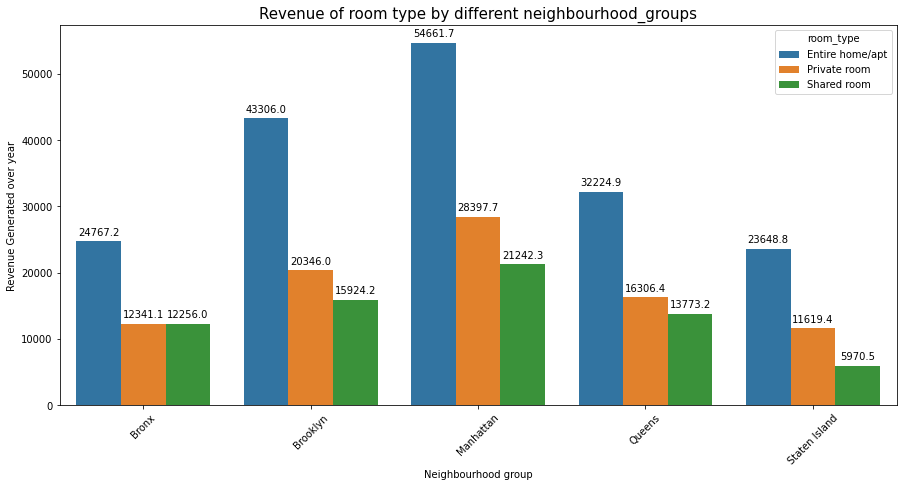

In [83]:
mean_revenue = df.groupby(["neighbourhood_group","room_type"])["revenue_generated"].mean().reset_index(name="revenue_generated")
fig,ax = plt.subplots(figsize=(15, 7))
sns.barplot(x='neighbourhood_group', y="revenue_generated",hue ='room_type', data=mean_revenue)
plt.xticks(rotation = 45,size =10)

plt.title('Revenue of room type by different neighbourhood_groups', size = 15)
plt.xlabel('Neighbourhood group')
plt.ylabel('Revenue Generated over year')

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=10) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=10) #fontsize of the x tick labels
plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
plt.rc('legend', fontsize=10) #fontsize of the legend

annot(ax)

**Observation:**

**As we can see that in every neighbourhood "Entire home" has generated most revenue. So buying a property "Entire home" and renting it, is a profitable business irrespective of neighbourhood type**.

##**Visualization on Maps using Latitude and longitude**

Text(0.5, 1.0, 'Airbnbs locations and Density across NYC')

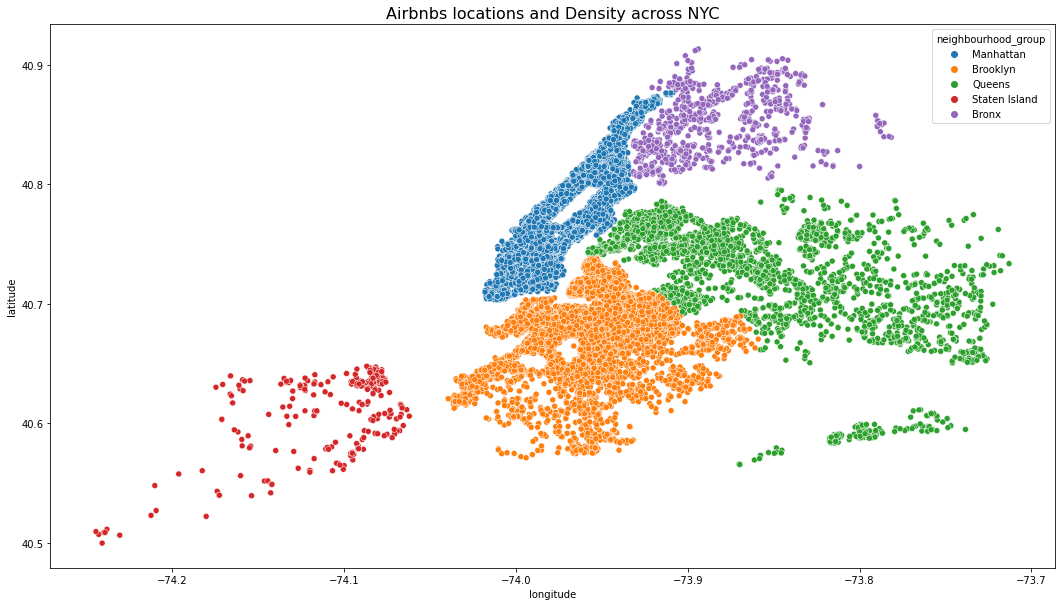

In [84]:

# Scatter plot to show distribution & density of airbnbs across entire NYC
fig, ax = plt.subplots(figsize=(18, 10))
sns.scatterplot(x=df.longitude, y=df.latitude, hue='neighbourhood_group',data=df).set_title('Airbnbs locations and Density across NYC',fontdict={'fontsize':16})


In [85]:
#Comparing the price and place : 
fig = px.scatter_mapbox(df,
           lat="latitude",
           lon="longitude",
           opacity = 0.3,
           hover_name="neighbourhood_group",
           hover_data=["neighbourhood_group", "price"],
           color="price",
           color_discrete_sequence=px.colors.sequential.PuBuGn,
           title = "Price comparing to the place",
           template = "plotly_dark",
           zoom=10
           )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},font = dict(size=17,family="Franklin Gothic"))
fig.show()


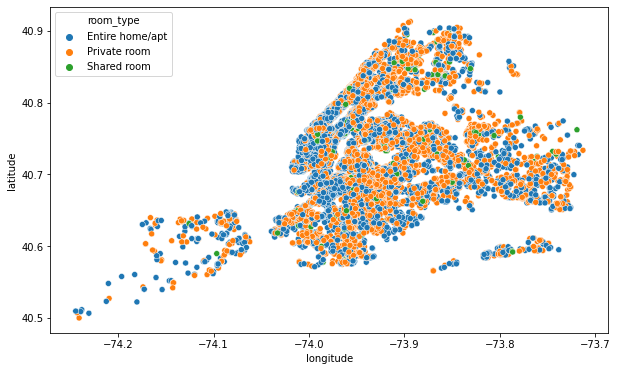

In [86]:
# Map of Room Type:

plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude, df.latitude, hue=df.room_type)
plt.ioff()

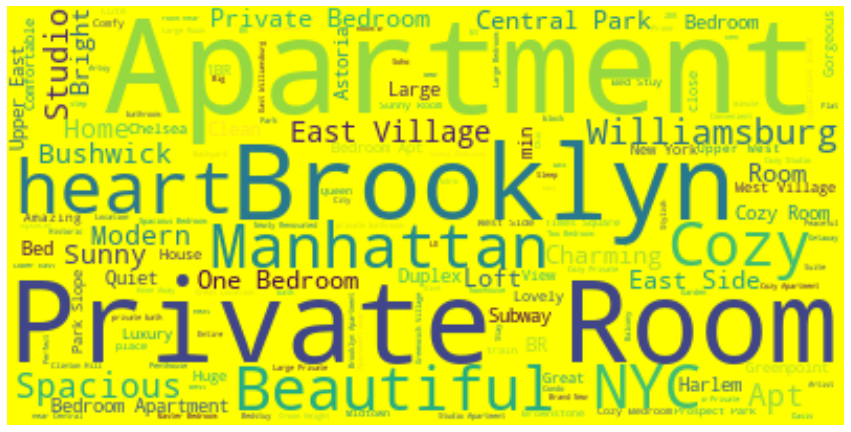

In [87]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="yellow").generate(text)
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# <center>**CONCLUSION**

Data from Airbnb NYC 2019 provides detailed information about the prices, locations, customer preferences for staying, and properties available in various New York cities. We began our EDA by performing a basic check to determine the number of rows (i.e records) and columns (i.e variables), followed by a through examination of the columns to be used in our analysis. Then, we perform data wrangling to check and replace any null values present in the data and also drop some columns.

1.	Maximum listings are listed on Manhattan and Brooklyn neighbourhood_groups. Staten Island and Bronx neighbourhood_group have very less numbers of listings..
2.	Most visitors don't prefer shared rooms, they tend to visit private room or entire home/apt
3.	Williamsburg is the neighbourhood with highest number of listings in entire NYC. It means this place is famous for tourists attraction.
4.	Most of the Type of Neighbourhood_regions are Manhattan and Brookyln in Entire_home/apt and Private_room not preferred in shared_room.
5.	Average prices of all the room_types in Manhattan are more than the average price of each room_type in other neighbourhood_group. Average prices of all the room_type in Bronx neighbourhood_group is less than all the other neighbourhood_group.
6.	Price Analysis: For buying a property to get business with airbnb, Brooklyen and queens are most prefered neighbourhood group because of less saturation level compaired to Manhatten and having a growing customer base as compared to other neighbourhood group. 
7.	Listing Analysis: Around 44.3% properties are listed in Manhattan followed by 41.1% in Brooklyn. Staten island has minimum number of listed properties.
8.	Availabitly Analysis: it shows  Manhatten and Brroklyn have less availibility then compared to other neighbourhood groups which is good for the host having these propeties.
9.	Profitability Analysis: we can see that in every neighbourhood "Entire home" has generated most revenue. So buying a property "Entire home" and renting it, is a profitable business irrespective of neighbourhood type.
10.	Visual Analysis: while analysis the plot will get very high density in Manhattan based on neighbourhood group. Even price are very less in Bronx and Queens when compare compare to other place.
11.	Using visual analysis which can easily to see most of the host are preferring Entire home/ apt or private room.
12.	Using WordCloud analysis to see most useful word in the plot from all the features.
